<a href="https://colab.research.google.com/github/tuva-health/notebooks/blob/main/medicare_lds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook explores the Medicare LDS SAF dataset.  We purchased the Medicare LDS SAF from CMS for the purpose of building out the Tuva Project.  The dataset is from 2020 and includes 100% Part A claims 5% Part B claims and 100% member eligibility data.  From this data we created a true 5% sample, which the analytics below are based on. 

# I. Import Data

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.cloud import bigquery
client = bigquery.Client(project='medicare-lds-five-percent')
# client = bigquery.Client(project='tuva-claims-demo')

In [3]:
sql_query = ('''SELECT *
                FROM core.patient
                ''')
patient = client.query(sql_query).to_dataframe()

sql_query = ('''SELECT *
                FROM chronic_conditions.tuva_chronic_conditions_wide
                ''')
chronic_conditions = client.query(sql_query).to_dataframe()

# 2. Claims Data Profiling

In [4]:
patient.isna().sum()

patient_id           0
gender               0
race                 0
birth_date           0
death_date     3158164
death_flag           0
first_name     3296240
last_name      3296240
address        3296240
city           3296240
state              453
zip_code       3296240
phone          3296240
data_source          0
dtype: int64

In [9]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296240 entries, 0 to 3296239
Data columns (total 14 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   patient_id   object
 1   gender       object
 2   race         object
 3   birth_date   dbdate
 4   death_date   dbdate
 5   death_flag   Int64 
 6   first_name   object
 7   last_name    object
 8   address      object
 9   city         object
 10  state        object
 11  zip_code     object
 12  phone        object
 13  data_source  object
dtypes: Int64(1), dbdate(2), object(11)
memory usage: 355.2+ MB


# 3. Patient Population

In [5]:
patient.gender.value_counts()

female    1784785
male      1511455
Name: gender, dtype: int64

In [6]:
patient.race.value_counts()

white                               2584321
black or african american            356208
other race                           176049
asian                                 88808
unknown                               76589
american indian or alaska native      14265
Name: race, dtype: int64

In [16]:
import pandas as pd
from datetime import datetime

In [50]:
# convert birth dates to datetime format
patient['birth_date'] = pd.to_datetime(patient['birth_date'])

# calculate age from birth date
today = datetime.today()
patient['age'] = (today - patient['birth_date']).astype('<m8[Y]')

# define age groups
bins = [0, 65, 75, 85, 90, 100]

# define labels for age groups
labels = ['0-65','65-75','75-85','85-90','90-100']

# use pandas cut function to group ages into age groups
patient['age_group'] = pd.cut(patient['age'], bins=bins, labels=labels)

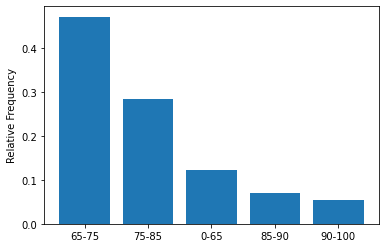

In [51]:
import matplotlib.pyplot as plt

# calculate the relative frequencies of each category
relative_frequencies = patient['age_group'].value_counts(normalize=True)

# create a bar plot from the relative frequencies
plt.bar(relative_frequencies.index, relative_frequencies.values)

# set the y-axis label to "Relative Frequency"
plt.ylabel('Relative Frequency')

# # create a histogram from the category counts
# plt.hist(category_counts, bins=len(category_counts))

# # # set the x-axis labels to the category names
# plt.xticks(range(len(category_counts)), category_counts.index)

# # # show the histogram
plt.show()

In [46]:
relative_frequencies

65-75     0.536528
75-85     0.322856
85-90     0.080244
90-100    0.060371
Name: age_group, dtype: float64

In [28]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296240 entries, 0 to 3296239
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   patient_id   object        
 1   gender       object        
 2   race         object        
 3   birth_date   datetime64[ns]
 4   death_date   dbdate        
 5   death_flag   Int64         
 6   first_name   object        
 7   last_name    object        
 8   address      object        
 9   city         object        
 10  state        object        
 11  zip_code     object        
 12  phone        object        
 13  data_source  object        
 14  age          float64       
 15  age_group    category      
dtypes: Int64(1), category(1), datetime64[ns](1), dbdate(1), float64(1), object(11)
memory usage: 383.5+ MB


# 4. PMPM

# 5. Hospital Measures